In [1]:
# Load modules
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc
import cartopy.feature as cf                                                                                                        
from pathlib import Path
import psyplot.project as psy
import sys
import six
# To work with self-written modules, the paths of the modules directories have to be added
data_dir = Path(Path.cwd().parent,'example_datasets')
sys.path.insert(1,str(data_dir))
data_dir = Path(Path.cwd().parent,'python_modules')
sys.path.insert(1,str(data_dir))
from get_data import get_data
from grid import check_grid_information, add_grid_information
from utils import add_coordinates

In [2]:
# Get example datasets for testing (won't do anything if data is already downloaded)
get_data()

In [3]:
# Read in nc file

# If the nc file is missing grid information (no variables clon_bnds and clat_bnds),
# the information needs to be added with a grid file.
# The module "grid" contains a function to check if the grid information is available and a function to add it.

# Enter the path to your nc file or use one of the example datasets:
nc_file = '../example_datasets/lfff01000000.nc'
nc_file = '../example_datasets/my_exp1_atm_3d_ml_20180921T000000Z.nc'
# If necessary, add the corresponding grid file:
grid_file = '../example_datasets/ICON-1E_DOM01.nc'

if check_grid_information(nc_file):
    print('The grid information is available')
    data = psy.open_dataset(nc_file)
else:
    print('The grid information is not available')
    data = add_grid_information(nc_file,grid_file)

The grid information is available


In [4]:
# Check which variables are available
for var in data.variables:
    print(var)

clon
clon_bnds
clat
clat_bnds
elon
elon_bnds
elat
elat_bnds
height
height_bnds
height_2
height_3
depth
depth_2
depth_2_bnds
depth_3
depth_3_bnds
height_4
depth_4
depth_4_bnds
time
u
v
vt
qc
qi
qr
qs
qv
rho
theta_v
tke
vn
w
ddt_vn_phy
ddt_exner_phy
ddt_temp_dyn
exner_pr
exner_dyn_incr
pres_sfc
ddt_pres_sfc
temp
tempv
temp_ifc
pres
pres_ifc
dpres_mc
omega
div
div_ic
hdef_ic
dwdx
dwdy
vor
mass_fl_e
rho_ic
w_concorr_c
theta_v_ic
vn_ie
tqv
tqc
tqi
tqr
tqs
rain_gsp_rate
rain_gsp
tot_prec
cape
cape_ml
cin_ml
gust10
dyn_gust
clct_mod
cldepth
tot_qv_dia
tot_qc_dia
tot_qi_dia
tqv_dia
tqc_dia
tqi_dia
avg_qv
avg_qc
avg_qi
tsfctrad
thbclr_s
thb_t
thb_s
thu_s
lwflxall
t_s
t_sk
t_so
runoff_s
lwflx_up
lwflx_dn
lwflx_up_clr
lwflx_dn_clr
shfl_s
lhfl_s
lhfl_bs
lhfl_pl
qhfl_s
qcfl_s
t_2m
qv_2m
rh_2m
td_2m
u_10m
v_10m
sp_10m
umfl_s
vmfl_s
str_u_sso
str_v_sso
drag_u_grid
ddt_temp_radlw
ddt_temp_turb
ddt_temp_drag
ddt_temp_pconv
ddt_u_turb
ddt_u_sso
ddt_u_pconv
ddt_v_turb
ddt_v_sso
ddt_qv_turb
ddt_qc_turb
dd

In [5]:
# show figures after they are drawn or updated
psy.rcParams['auto_show'] = True
%matplotlib inline
%config InlineBackend.close_figures = False

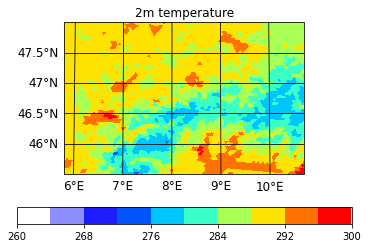

In [6]:
# create psyplot instance
# name: name of variable
# projection: e.g. robin
# bounds: Define min and max of colorbar
# title: title of plot
# xgrid/ygrid: Add grids
# map_extent: borders of map (example for Switzerland)
lonmin = 5.8
lonmax = 10.7
latmin = 45.5
latmax = 48.0

pp = psy.plot.mapplot(data,
    name = 't_2m',
    t = 0,
    projection = 'robin',
    bounds = {'method': 'minmax', 'vmin':260, 'vmax':300},
    map_extent = [lonmin, lonmax, latmin, latmax],
    title = '2m temperature') 

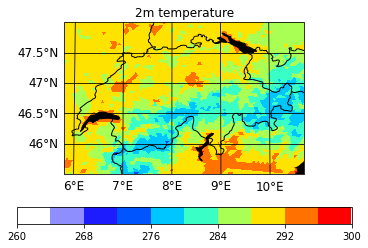

In [7]:
# Add borders and lakes with cartopy
ax = pp.plotters[0].ax
resol = '10m'                                                                  
lakes = cf.NaturalEarthFeature(category='physical', name='lakes', scale=resol, edgecolor='k', facecolor='k')                                                          
ax.add_feature(cf.BORDERS)                                                     
ax.add_feature(lakes)

pp.update()

/Users/alauber/opt/anaconda3/envs/psyplot/lib/python3.7/site-packages/psy_simple/plotters.py:3039: MatplotlibDeprecationWarning: 
The on_mappable_changed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use update_normal instead.
  mappable.changed()


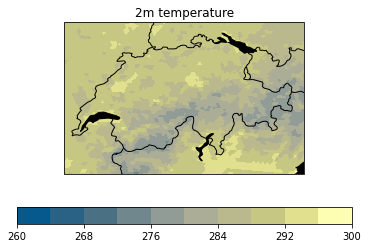

In [8]:
# Remove grid and set colorbar
pp.update(xgrid = False, ygrid = False, cmap='cmc.nuuk')

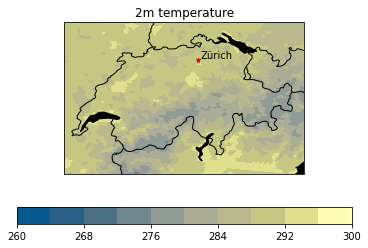

In [9]:
# Add coordinates (e.g. Zürich)
lon = 8.54
lat = 47.38
pos_lon,pos_lat = add_coordinates(lon,lat,lonmin,lonmax,latmin,latmax)

# go to matplotlib level for adding coordinate                                                                                                    
fig = plt.gcf()
fig.axes[0].plot(pos_lon, pos_lat,'r',marker='*', markersize=5, transform=fig.axes[0].transAxes) 
fig.axes[0].text(pos_lon+0.01, pos_lat+0.01, 'Zürich', transform=fig.axes[0].transAxes)

pp.update()

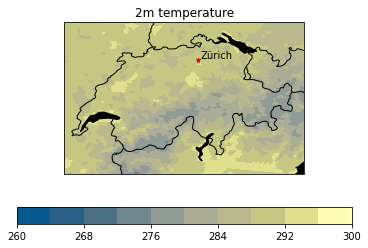

In [10]:
# save figure 
pp.update()                                                                                                                                                                                     
output_file = 'mapplot_example'                                                                                                                                  
plt.savefig(output_file) 